In [1]:
import bootcampviztools as bt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

mirar datos

In [2]:
df_train = pd.read_csv('../data/train.csv', index_col=0)
df_test = pd.read_csv('../data/test.csv', index_col=0)

df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df_train = df_train.set_index('id')
df_test = df_test.set_index('id')

df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 70172 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    103904

In [5]:
df_train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


mirar nulos

In [6]:
df_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [7]:
df_train['Arrival Delay in Minutes'].value_counts()

Arrival Delay in Minutes
0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: count, Length: 455, dtype: int64

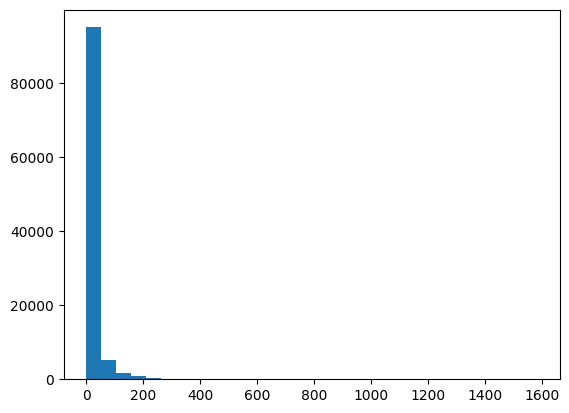

In [8]:
plt.hist(df_train['Arrival Delay in Minutes'], bins = 30);

mirar duplicados

In [9]:
df_train.duplicated().sum()

0

mirar el target si está balanceado on o

In [10]:
df_train.satisfaction.value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [11]:
df_train.satisfaction.value_counts(True)

satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64

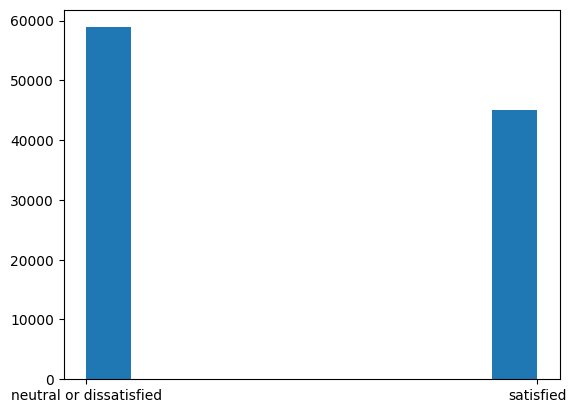

In [12]:
plt.hist(df_train.satisfaction);

In [13]:
#df_train.pairplot()

Pipeline 1

In [14]:
# Función para eliminar columnas con más del 50% de nulos
def drop_high_null_columns(df, threshold=50):
    null_percentage = df.isnull().mean() * 100
    cols_to_drop = null_percentage[null_percentage > threshold].index
    return df.drop(columns=cols_to_drop)

# Función para eliminar filas con nulos restantes
def drop_remaining_nulls(df):
    return df.dropna()

# Función para eliminar duplicados
def drop_duplicates(df):
    return df.drop_duplicates()

data_pipeline = Pipeline([
    ('drop_high_nulls', FunctionTransformer(drop_high_null_columns)),  # Elimina columnas con muchos nulos
    ('drop_remaining_nulls', FunctionTransformer(drop_remaining_nulls)),  # Elimina filas con nulos
    ('drop_duplicates', FunctionTransformer(drop_duplicates))  # Elimina duplicados
])

df_train_cleaned = data_pipeline.fit_transform(df_train)
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 70172 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    103594

mirar que transformaciones haremos en las columnas en un pipeline
- gender: binaria
- Customer Type:binaria
- Age =
- 'Type of Travel': binaria
- Class: ordinal encoding/one hot (hay 3 clases)
- todas las numéricas = (luego miraremos si hacer log o no)
- satisfaction: binaria

In [15]:
df_train_cleaned['Customer Type'].value_counts()

Customer Type
Loyal Customer       84662
disloyal Customer    18932
Name: count, dtype: int64

In [16]:
df_train_cleaned['Type of Travel'].value_counts()

Type of Travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64

In [17]:
df_train_cleaned['Class'].value_counts()

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

In [18]:
df_train_cleaned.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Pipeline 2

In [19]:
target = 'satisfaction'

In [20]:
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 70172 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    103594

In [21]:
df_train_cleaned['Type of Travel'].value_counts()

Type of Travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64

In [22]:
#Identificar tipos de columnas automáticamente
numerical_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
binary_cols = [col for col in df_train_cleaned.select_dtypes(include=['object']).columns if df_train_cleaned[col].nunique() == 2]
#binary_cols = binary_cols.remove(target)




In [23]:
binary_cols.remove('satisfaction')

In [24]:
binary_cols

['Gender', 'Customer Type', 'Type of Travel']

In [25]:
numerical_cols

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [26]:
onehot_cols = [col for col in df_train_cleaned.columns if col not in numerical_cols and col not in binary_cols and col not in target]

In [27]:
onehot_cols

['Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

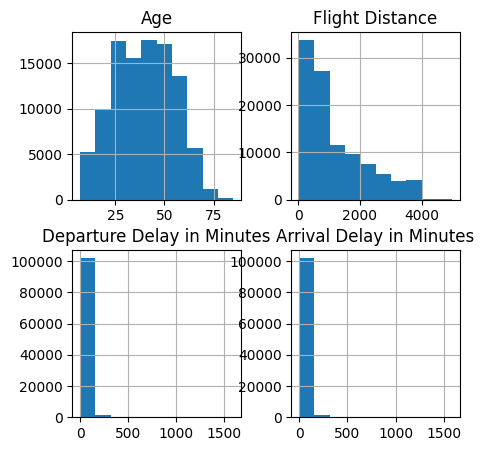

In [28]:
df_train_cleaned[numerical_cols].hist(figsize = (5,5))
plt.tight_layout
plt.show()

In [29]:
#features numericas a las que aplicar logaritmo:
numerical_cols_log = [col for col in numerical_cols if col != 'Age']

In [30]:
numerical_cols_log

['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

# Transformador personalizado para aplicar logaritmo a variables numéricas positivas
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols

    def fit(self, X, y=None):
        return self  # No necesita ajuste

    def transform(self, X):
        X_transformed = X.copy()
        # Aplicar logaritmo solo a las columnas especificadas
        X_transformed[self.cols] = np.log1p(X_transformed[self.cols])  # np.log1p(x) = log(x + 1) para evitar log(0)
        return X_transformed


# Crear el pipeline con el transformador de logaritmo
log_pipeline = Pipeline([
    ('log_transform', LogTransformer(numerical_cols_log))
])

In [32]:
df_train_cleaned = log_pipeline.fit_transform(df_train_cleaned)

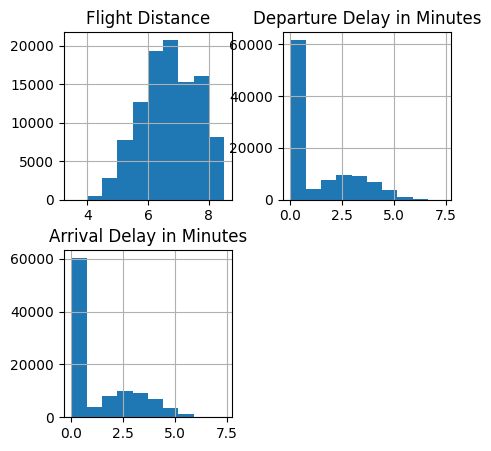

In [33]:
df_train_cleaned[numerical_cols_log].hist(figsize = (5,5))
plt.tight_layout
plt.show()

In [34]:
numerical_cols = numerical_cols_log + ['Age']

In [35]:
numerical_cols

['Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Age']

In [37]:
def label_encode_binary(X):
    X_encoded = X.copy()
    
    # Si X es una Serie (no un DataFrame), no necesitamos acceder a X.columns
    if isinstance(X_encoded, pd.Series):
        return X_encoded.astype("category").cat.codes
    else:
        for col in X_encoded.columns:
            X_encoded[col] = X_encoded[col].astype("category").cat.codes
        return pd.DataFrame(X_encoded, columns=X.columns)  # Mantiene los nombres originales

In [39]:
#Definir transformaciones
preprocessor = ColumnTransformer([
    #("target", FunctionTransformer(label_encode_binary, feature_names_out="one-to-one"), target),# label 
    ("binary", FunctionTransformer(label_encode_binary, feature_names_out="one-to-one"), binary_cols),  # Label Encoding para binarias
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False), onehot_cols),  # OneHotEncoder para categóricas con más de 2 clases
    ("scaler", StandardScaler(), numerical_cols)  # Escalado de numéricas
], remainder='passthrough')  # Mantiene columnas que no requieren transformación

#Crear pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

# Aplicar pipeline
array_transformed = pipeline.fit_transform(df_train_cleaned)

# Obtener nombres de columnas después de la transformación
feature_names = preprocessor.get_feature_names_out()

# Convertir a DataFrame con nombres de columnas correctos
df_transformed = pd.DataFrame(array_transformed, columns=feature_names)

df_transformed.head()

,binary__Gender,binary__Customer Type,binary__Type of Travel,onehot__Class_Business,onehot__Class_Eco,onehot__Class_Eco Plus,onehot__Inflight wifi service_0,onehot__Inflight wifi service_1,onehot__Inflight wifi service_2,onehot__Inflight wifi service_3,...,onehot__Cleanliness_1,onehot__Cleanliness_2,onehot__Cleanliness_3,onehot__Cleanliness_4,onehot__Cleanliness_5,scaler__Flight Distance,scaler__Departure Delay in Minutes,scaler__Arrival Delay in Minutes,scaler__Age,remainder__satisfaction
0,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,-0.624644,1.251013,1.02968,-1.745542,neutral or dissatisfied
1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,-1.355868,-0.333781,0.417532,-0.951526,neutral or dissatisfied
2,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.366986,-0.762053,-0.77541,-0.885358,satisfied
3,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.406356,0.773286,0.636191,-0.951526,neutral or dissatisfied
4,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,-1.457644,-0.762053,-0.77541,1.430521,satisfied


In [ ]:

#Función para aplicar Label Encoding a variables binarias SIN cambiar nombres
def label_encode_binary(X):
    X_encoded = X.copy()
    for col in X_encoded.columns:
        X_encoded[col] = X_encoded[col].astype("category").cat.codes
    return pd.DataFrame(X_encoded, columns=X.columns)  # Mantiene los nombres originales

#Definir transformaciones
preprocessor = ColumnTransformer([
    #("target", FunctionTransformer(label_encode_binary, feature_names_out="one-to-one"), target),# label 
    ("binary", FunctionTransformer(label_encode_binary, feature_names_out="one-to-one"), binary_cols),  # Label Encoding para binarias
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False), onehot_cols),  # OneHotEncoder para categóricas con más de 2 clases
    ("scaler", StandardScaler(), numerical_cols)  # Escalado de numéricas
], remainder='passthrough')  # Mantiene columnas que no requieren transformación

#Crear pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

# Aplicar pipeline
array_transformed = pipeline.fit_transform(df_train_cleaned)

# Obtener nombres de columnas después de la transformación
feature_names = preprocessor.get_feature_names_out()

# Convertir a DataFrame con nombres de columnas correctos
df_transformed = pd.DataFrame(array_transformed, columns=feature_names)

df_transformed.head()

AttributeError: 'Series' object has no attribute 'columns'

In [47]:
df_transformed.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
# Obtener nombres originales y nuevos nombres
binary_names = binary_cols  # Se mantienen igual//habria que cambiarlo
onehot_names = pipeline.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(onehot_cols).tolist()
numerical_names = numerical_cols  # Se mantienen igual//habria que cambiarlo

# Crear nuevo DataFrame con nombres originales o adaptados
new_col_names = binary_names + onehot_names + numerical_names
df_transformed = pd.DataFrame(df_transformed, columns=new_col_names)

df_transformed.head()

notas

In [ ]:
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores nulos con la media
    #('scaler', StandardScaler()),  # Escalar las características
    ('classifier', RandomForestClassifier())  # Modelo de clasificación
])


#Entrenar el pipeline
pipeline.fit(X_train, y_train)

#Evaluar el pipeline en el conjunto de prueba
score = pipeline.score(X_test, y_test)
print(f'Accuracy: {score}')


## Pipelines posibles

1. Limpiar nulos (nos los cargamos porque son pocos) y duplicados (no hay) -- Hecho
2. Transformar columnas: one hot encoding, binarias, logaritmos, estandarizar -- Falta aplicar logaritmos y estandarizar
3. Feature selection - correlaciones - elegir algún criterio (pipeline que te diga qué sí y qué no, pipeline que elimine las que no, por ej)
4. Modelo base
5. Gridsearch
6. Hiperparámetros y modelo final